# Clustering

### Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.clustering import *
from sklearn.datasets import make_blobs
mpl.rcParams['figure.dpi'] = 300

### Generating a Synthetic Dataset

In [2]:
cols = ['column1', 'column2', 'column3',
        'column4', 'column5']

arr = make_blobs(n_samples = 1000, n_features = 5, random_state = 20,
                 centers = 3, cluster_std = 1)

data = pd.DataFrame(data = arr[0], columns = cols)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   column1  1000 non-null   float64
 1   column2  1000 non-null   float64
 2   column3  1000 non-null   float64
 3   column4  1000 non-null   float64
 4   column5  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


### Exploratory Data Analysis

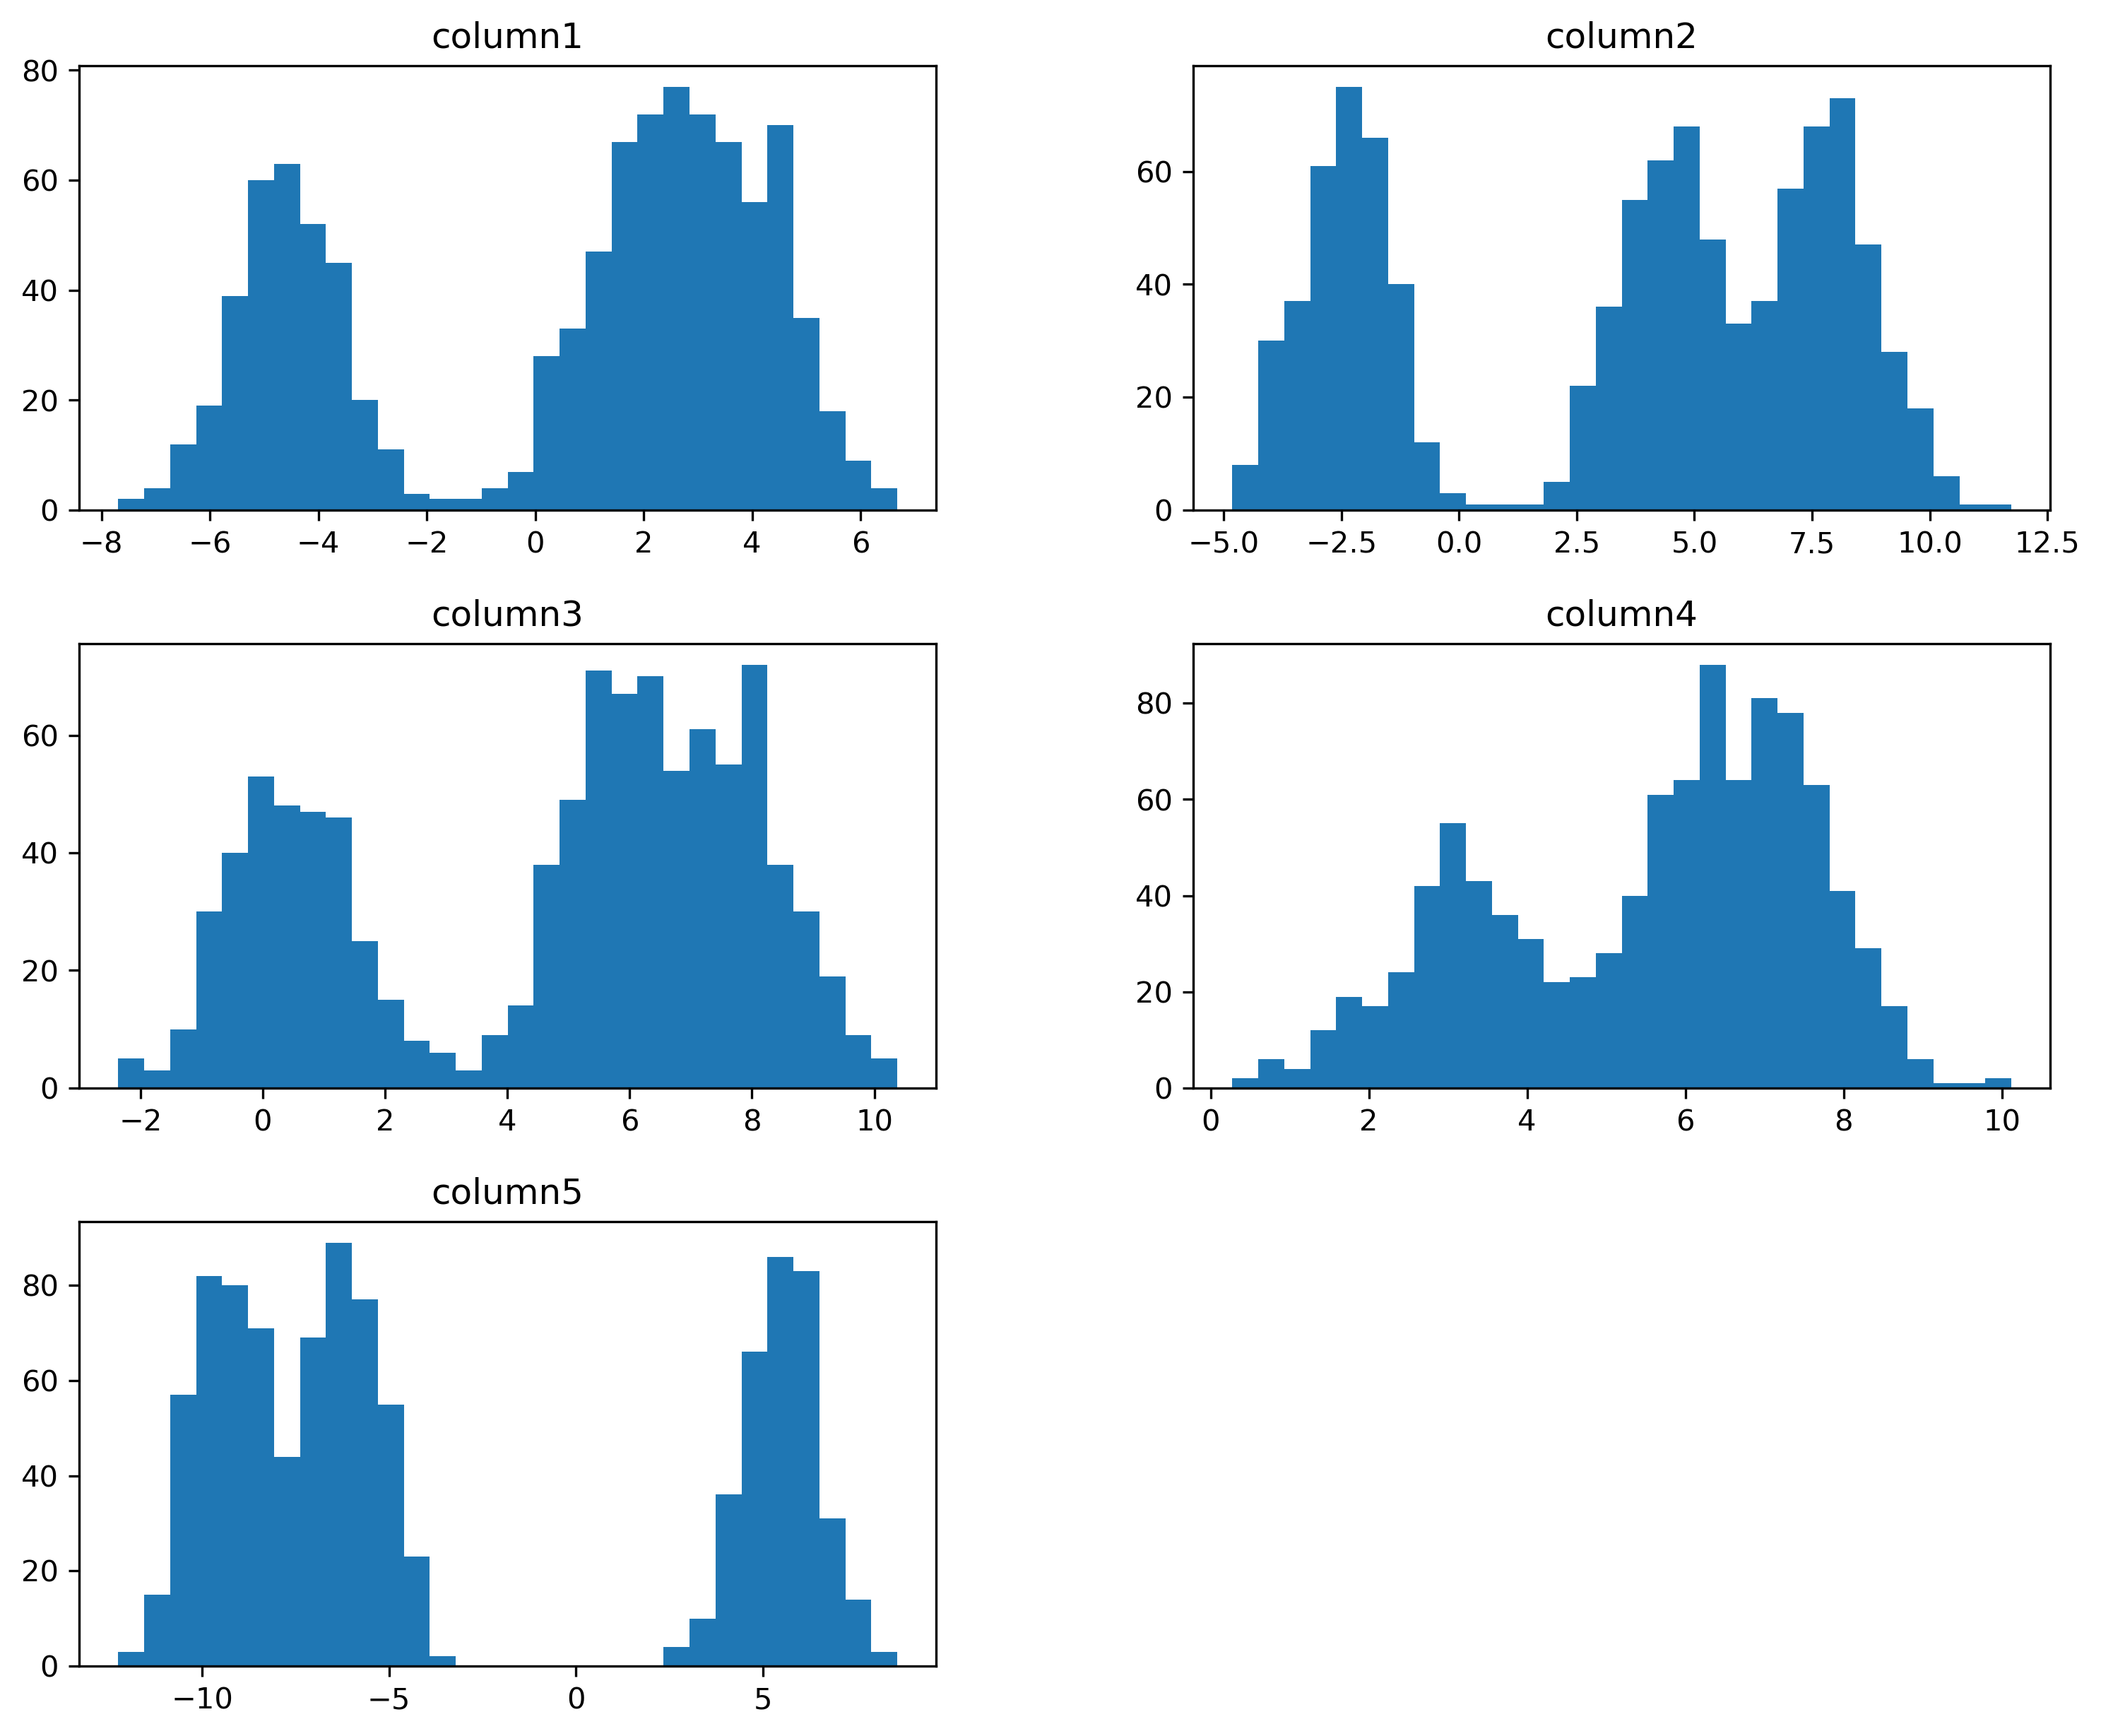

In [3]:
data.hist(bins = 30, figsize = (12,10), grid = False)

plt.show()

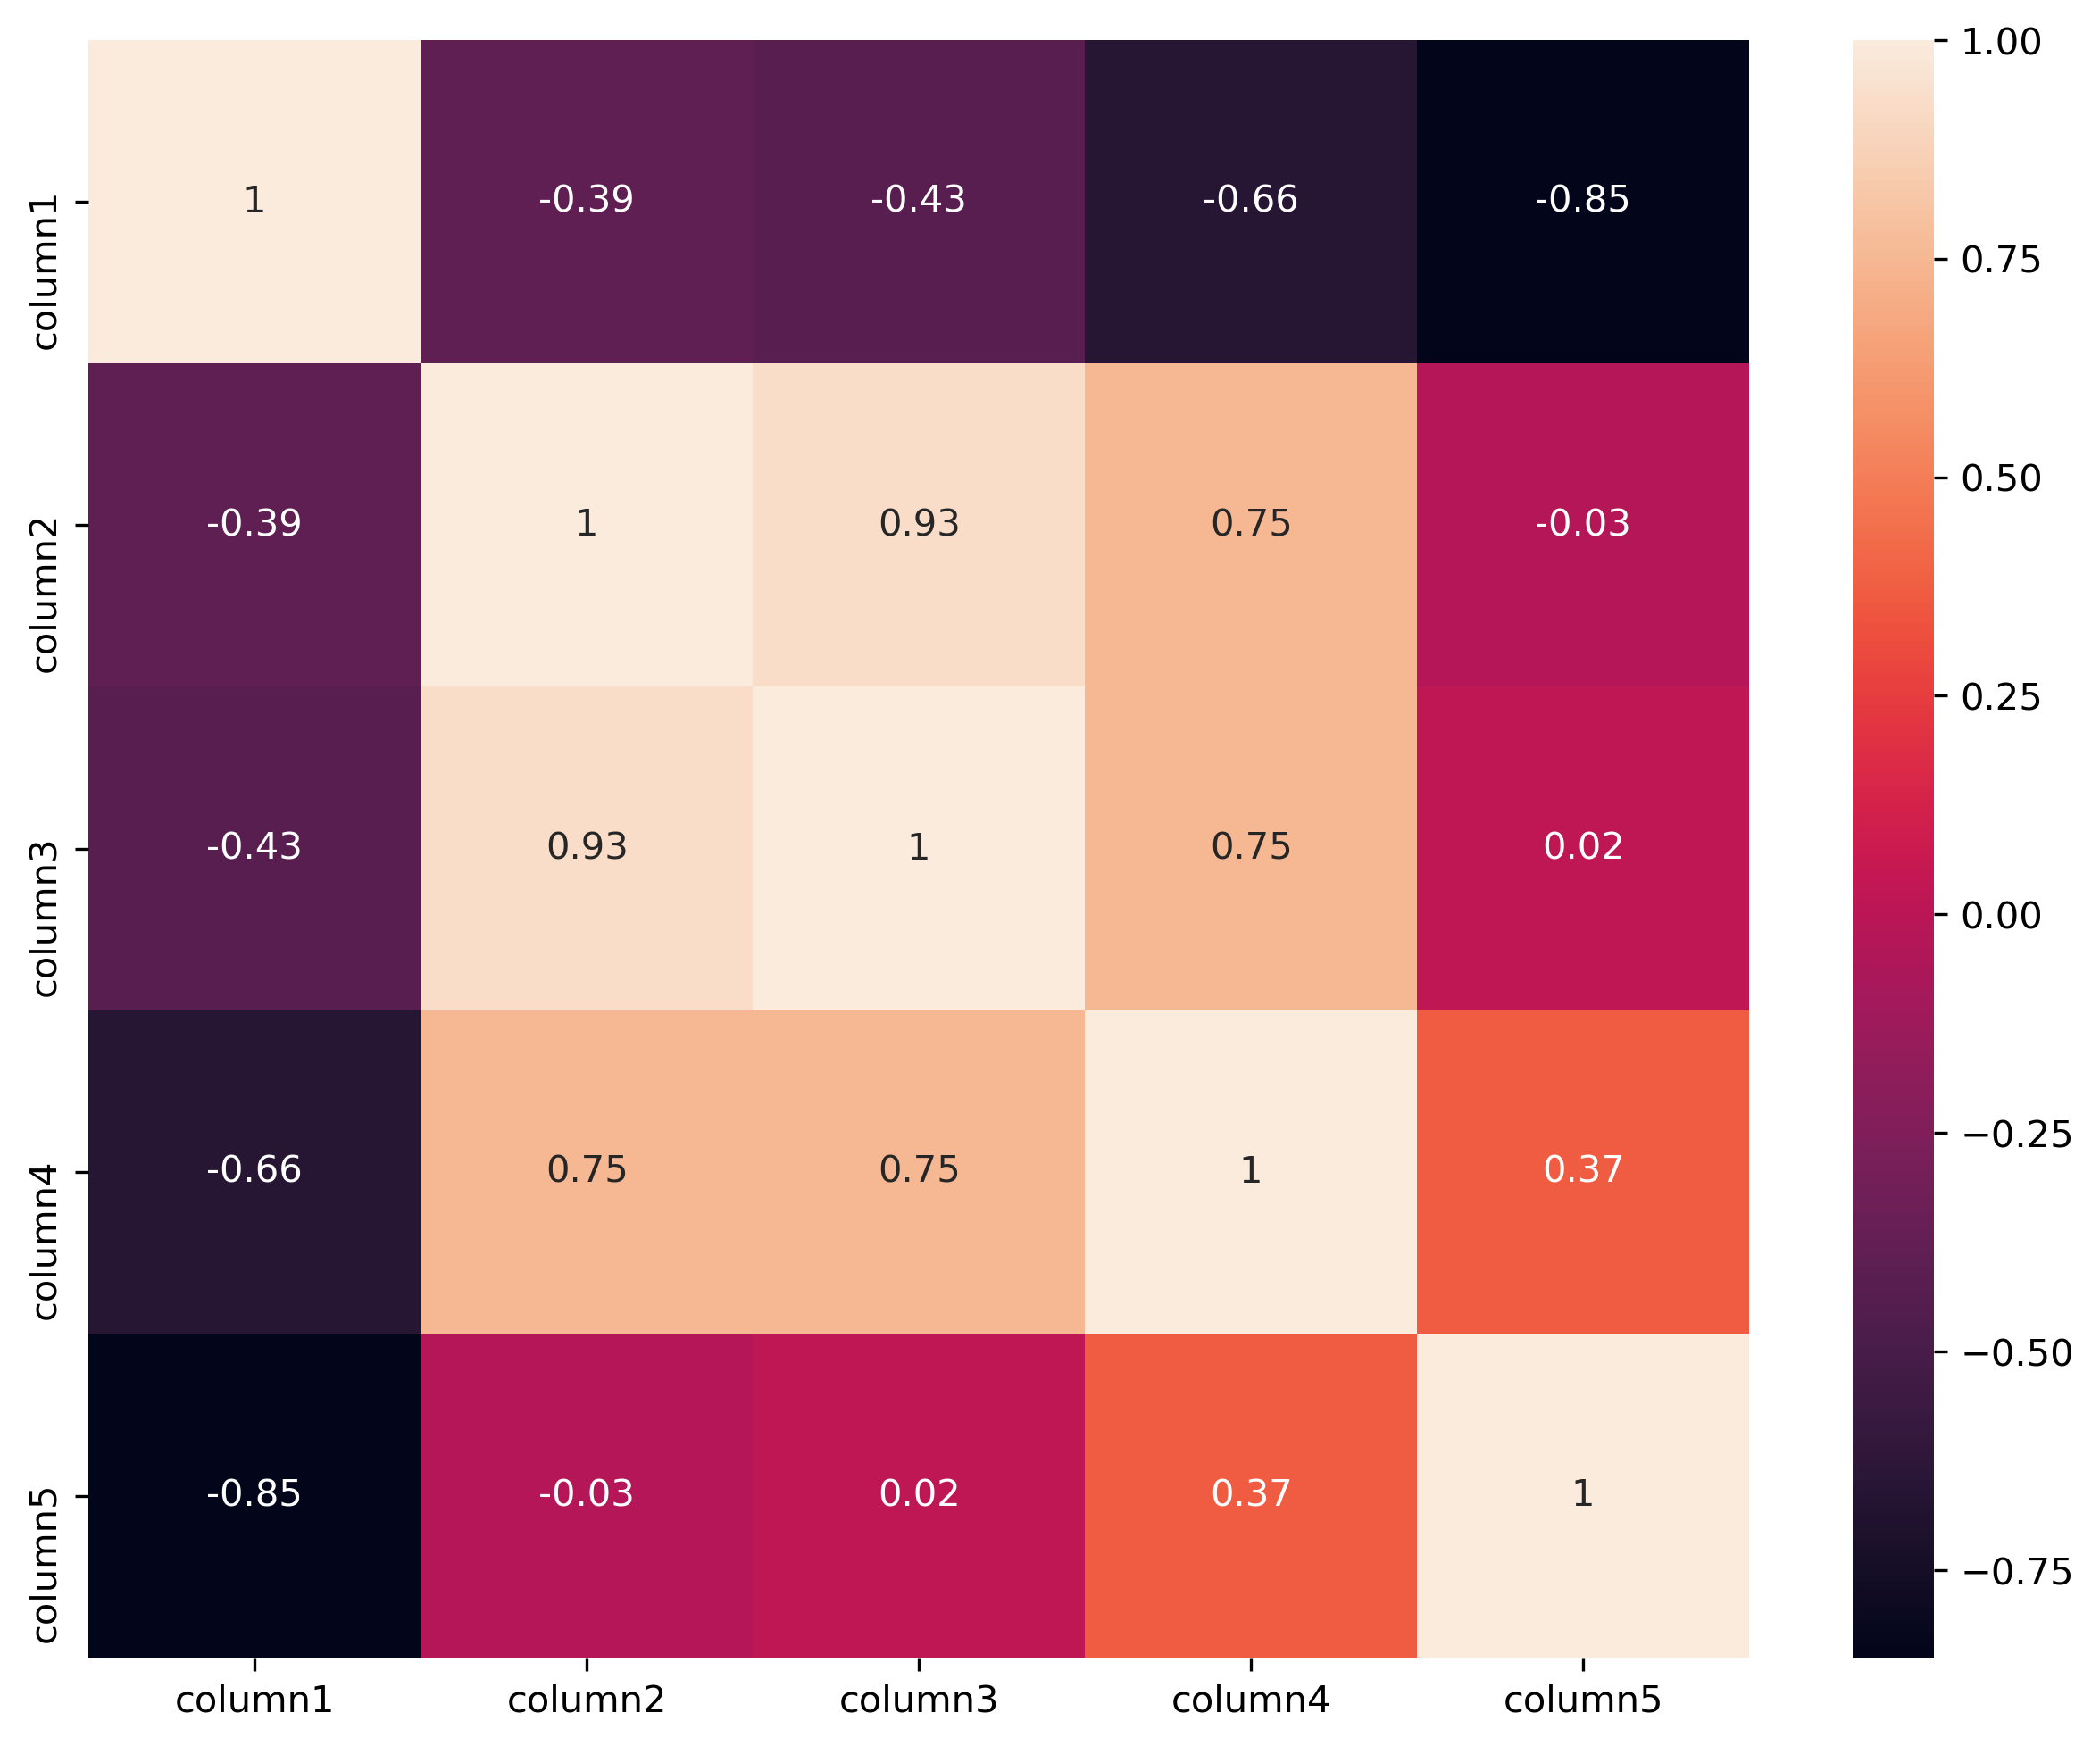

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot=True)

plt.show()

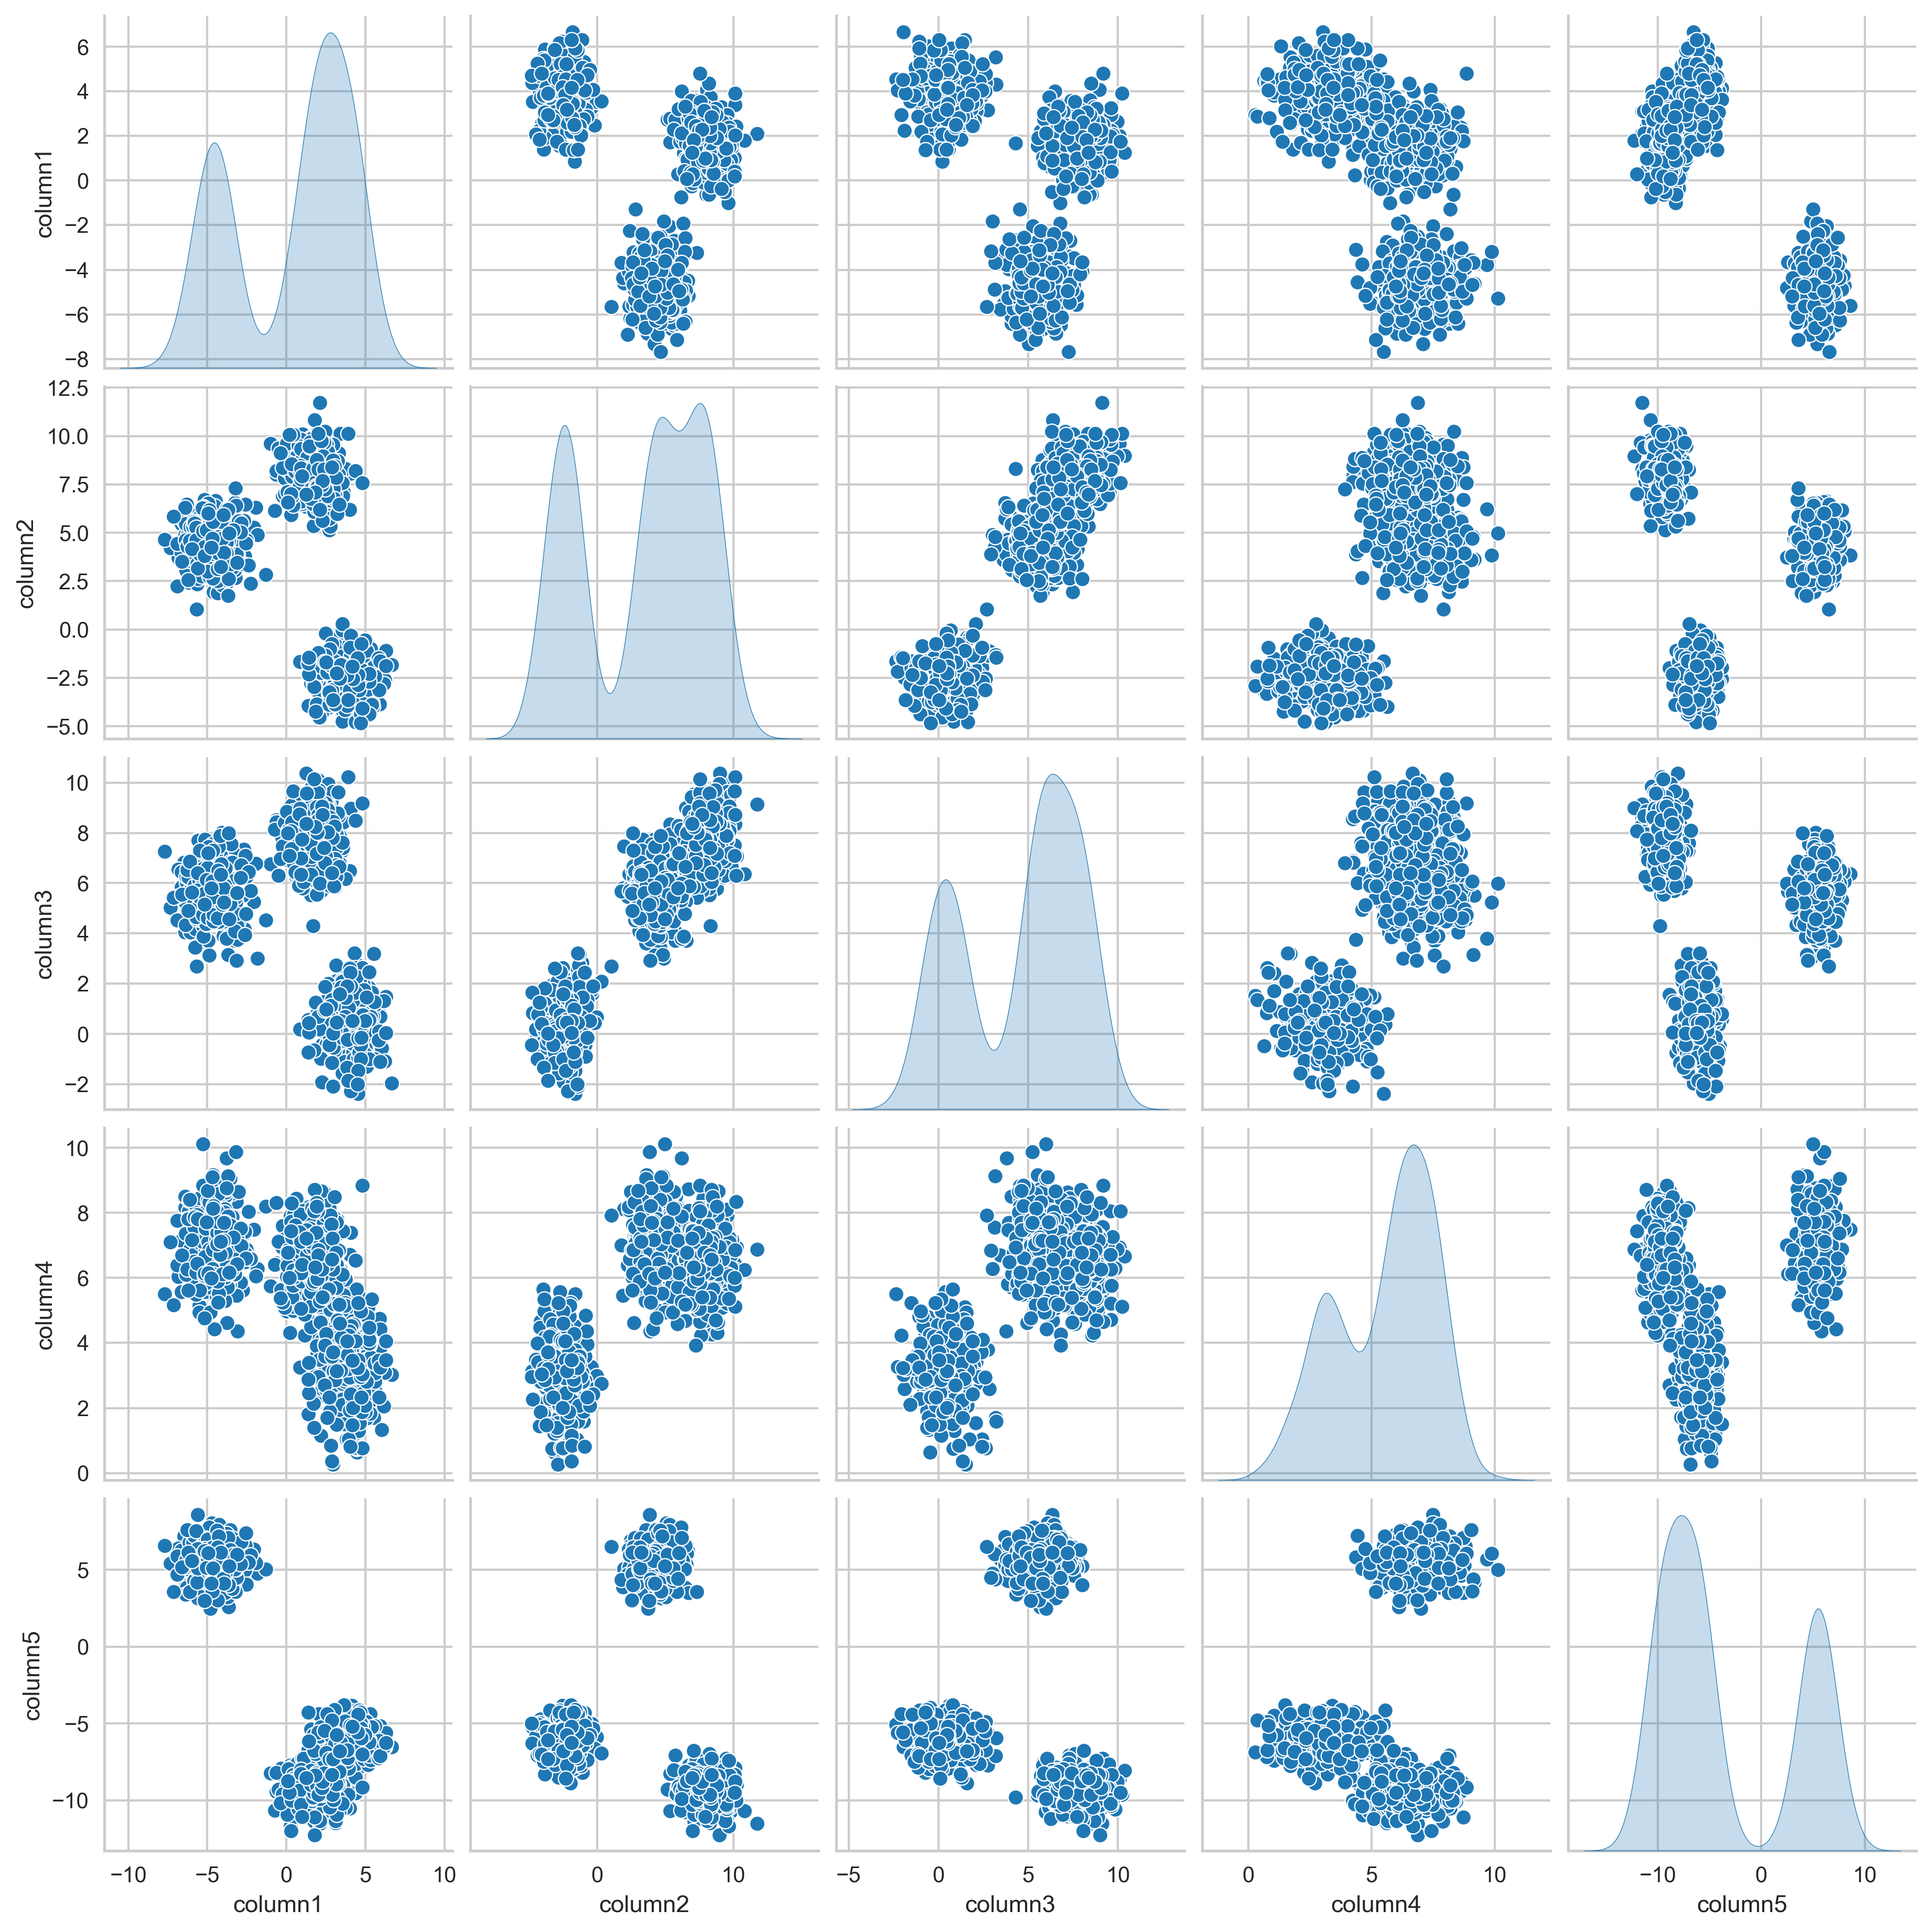

In [18]:
#sns.set_palette('tab10')

sns.pairplot(data, diag_kind = 'kde')

plt.show()

### Initializing the PyCaret Environment

In [6]:
cluster = setup(data)

### Creating a Model

In [7]:
model = create_model('kmeans')

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.5851           6048.126          1.2204            0           0   

   Completeness  
0             0

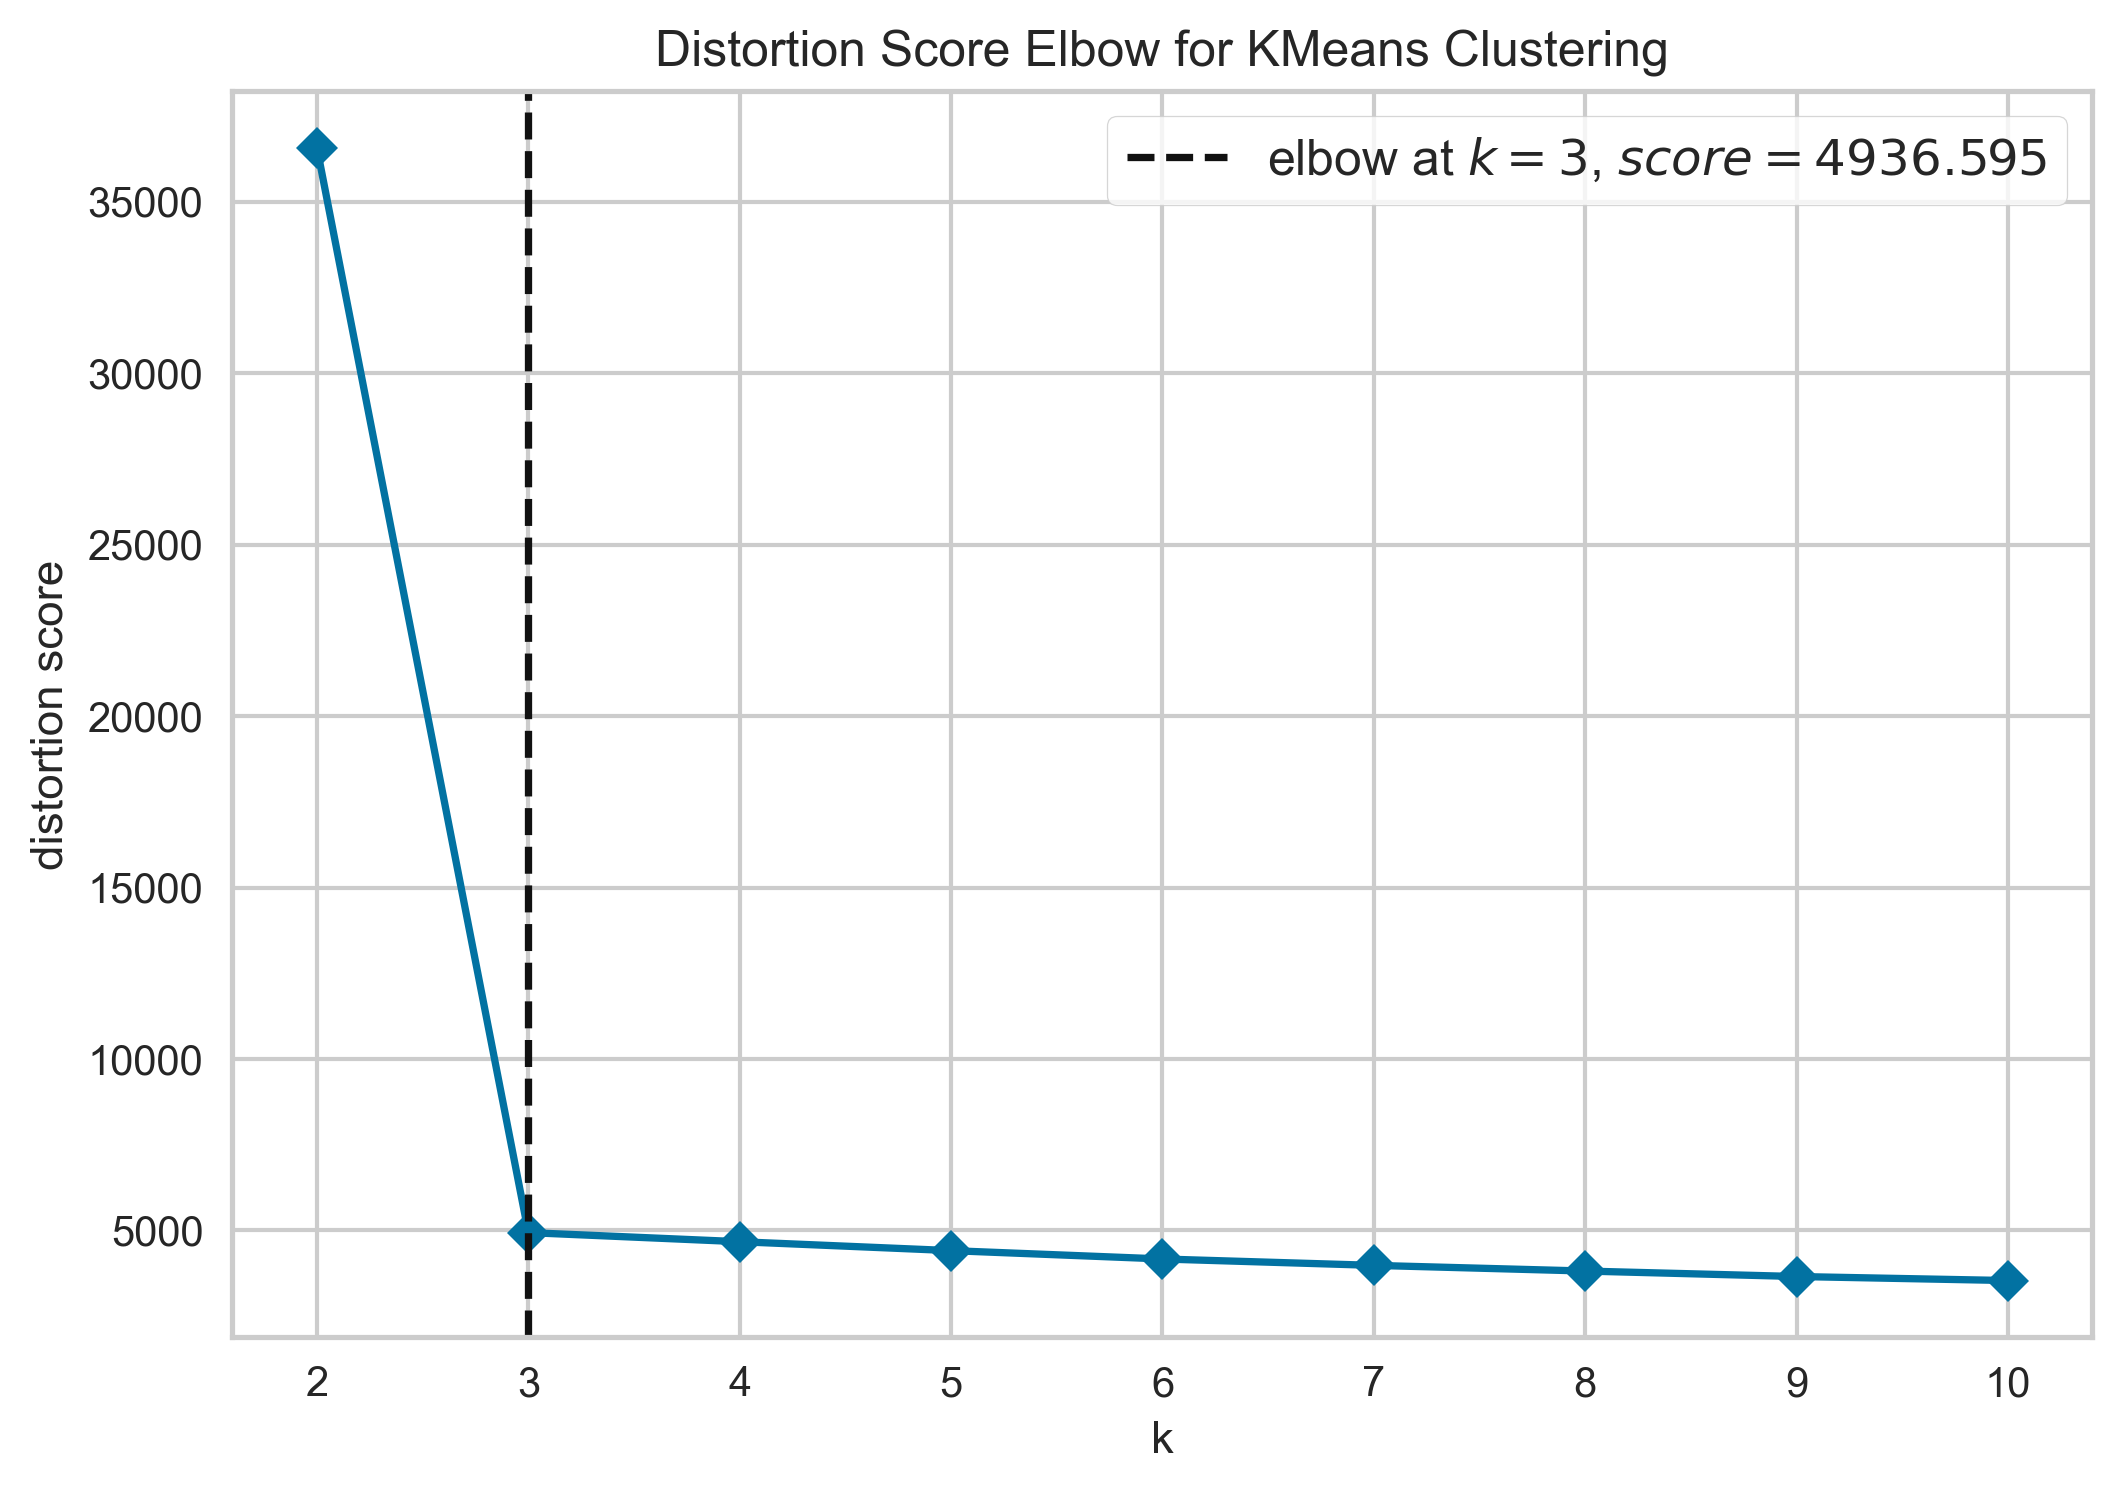

In [8]:
plot_model(model, 'elbow')

In [9]:
model = create_model('kmeans', num_clusters = 3)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.7972          8565.5114          0.2904            0           0   

   Completeness  
0             0

### Plotting the Model

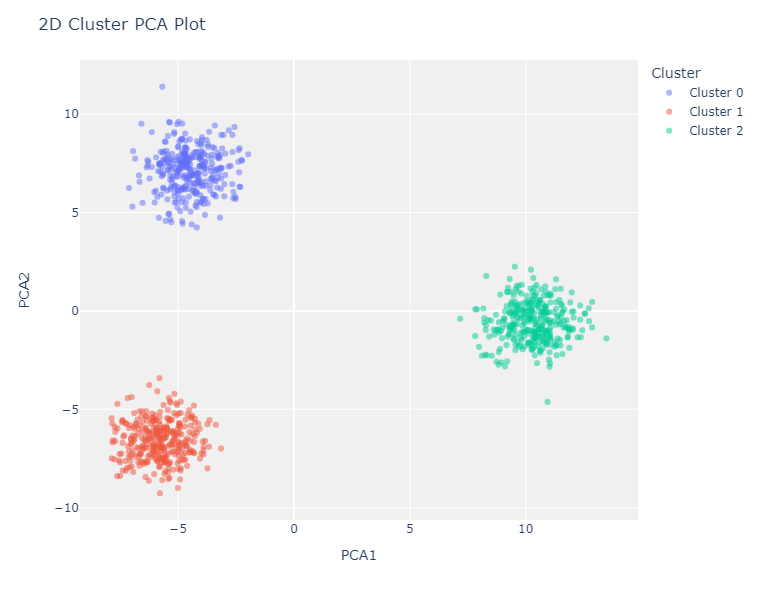

In [10]:
plot_model(model)

### Assigning the Model

In [11]:
results = assign_model(model)

results.head()

column1   column2   column3   column4   column5    Cluster
0  2.916076  6.504857  8.246937  6.185952 -9.776481  Cluster 0
1 -2.044462  5.282757  5.265467  7.487941  6.347177  Cluster 2
2  3.439328 -3.020505 -0.783592  2.907385 -6.117881  Cluster 1
3  2.155568  8.776136  5.788650  5.751763 -7.609132  Cluster 0
4 -6.650020  5.458227  5.848407  7.150584  5.992247  Cluster 2

### Finalizing and Saving the Model